In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
data=pd.read_csv("G:/ExcelR_Data/Data_Science_Course/Assignments/Decision Trees/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
#Creating new variable in dataset which satisfied income criteria and labeling it
data["Y"] = np.where(data['Taxable.Income']<= 30000, 'Risky', 'Good') 
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Y
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [4]:
#Converting categorical values into numerical values
le = preprocessing.LabelEncoder()
data['Undergrad']=le.fit_transform(data['Undergrad'])
data['Marital.Status']=le.fit_transform(data['Marital.Status'])
data['Urban']=le.fit_transform(data['Urban'])
data['Y']=le.fit_transform(data['Y'])

In [5]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Y
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [6]:
#Input variables
x=data.drop(["Y","Taxable.Income"],axis=1)
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [7]:
#Target variable
y=data["Y"]

In [8]:
data['Y'].unique() 

array([0, 1])

In [9]:
data.Y.value_counts() 

0    476
1    124
Name: Y, dtype: int64

In [10]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

In [11]:
#Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(167.4, 195.696, 'X[2] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(104.625, 152.208, 'X[3] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [93, 13]'),
 Text(83.7, 108.72, 'X[2] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [68, 13]'),
 Text(41.85, 65.232, 'X[4] <= 0.5\nentropy = 0.811\nsamples = 36\nvalue = [27, 9]'),
 Text(20.925, 21.744, 'entropy = 0.964\nsamples = 18\nvalue = [11, 7]'),
 Text(62.775000000000006, 21.744, 'entropy = 0.503\nsamples = 18\nvalue = [16, 2]'),
 Text(125.55000000000001, 65.232, 'X[4] <= 0.5\nentropy = 0.433\nsamples = 45\nvalue = [41, 4]'),
 Text(104.625, 21.744, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(146.475, 21.744, 'entropy = 0.65\nsamples = 24\nvalue = [20, 4]'),
 Text(125.55000000000001, 108.72, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(230.175, 152.208, 'X[2] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [291, 83]'),
 Text(209.25, 108.72, 'entropy = 0.0\nsamples = 2\nvalue = [0, 

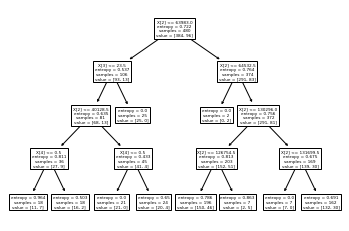

In [12]:
#PLot the decision tree
tree.plot_tree(model)

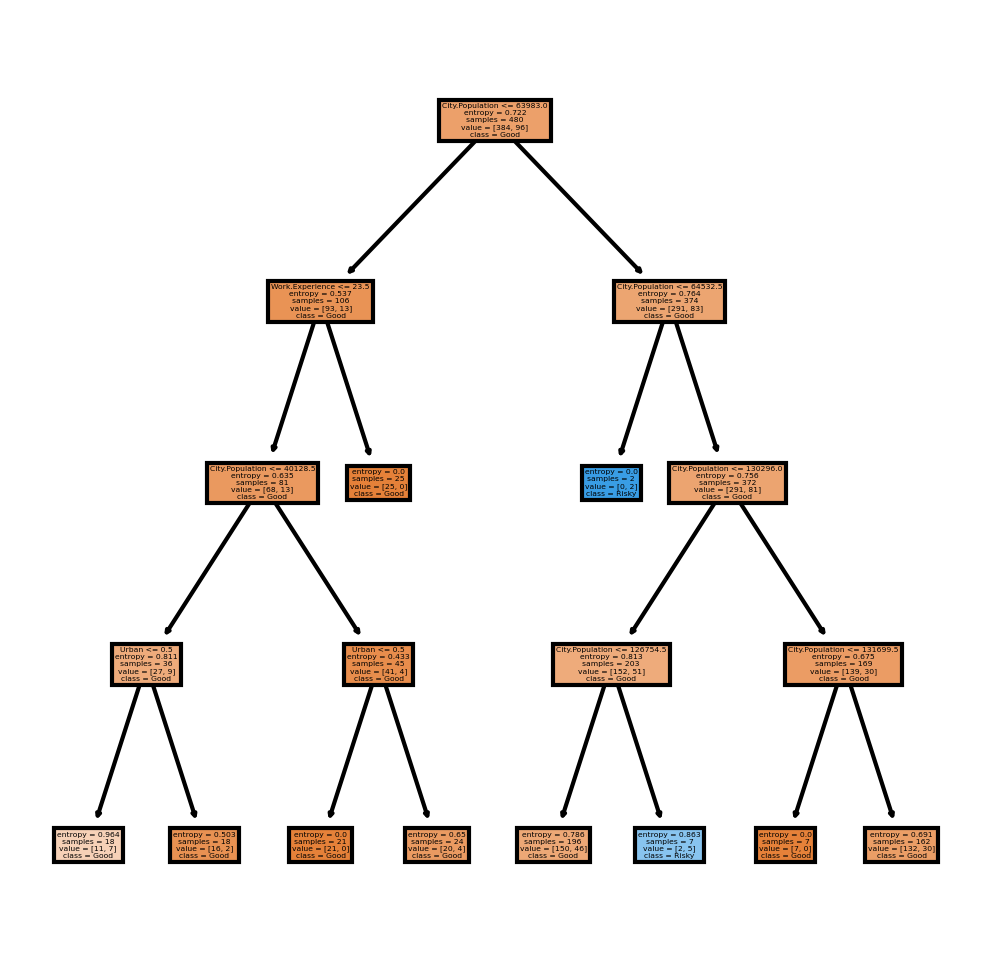

In [13]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [14]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    117
1      3
dtype: int64

In [15]:
preds 

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Y,,
0,90,2
1,27,1


In [17]:
# classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86        92
           1       0.33      0.04      0.06        28

    accuracy                           0.76       120
   macro avg       0.55      0.51      0.46       120
weighted avg       0.67      0.76      0.68       120



In [18]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [19]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4) 

In [20]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=4)

[Text(167.4, 195.696, 'X[2] <= 63983.0\ngini = 0.32\nsamples = 480\nvalue = [384, 96]'),
 Text(93.0, 152.208, 'X[2] <= 40128.5\ngini = 0.215\nsamples = 106\nvalue = [93, 13]'),
 Text(55.800000000000004, 108.72, 'X[2] <= 39660.0\ngini = 0.331\nsamples = 43\nvalue = [34, 9]'),
 Text(37.2, 65.232, 'X[3] <= 21.5\ngini = 0.308\nsamples = 42\nvalue = [34, 8]'),
 Text(18.6, 21.744, 'gini = 0.367\nsamples = 33\nvalue = [25, 8]'),
 Text(55.800000000000004, 21.744, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(74.4, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(130.20000000000002, 108.72, 'X[4] <= 0.5\ngini = 0.119\nsamples = 63\nvalue = [59, 4]'),
 Text(111.60000000000001, 65.232, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(148.8, 65.232, 'X[2] <= 60278.5\ngini = 0.202\nsamples = 35\nvalue = [31, 4]'),
 Text(130.20000000000002, 21.744, 'gini = 0.165\nsamples = 33\nvalue = [30, 3]'),
 Text(167.4, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(241.8, 152.208, 'X

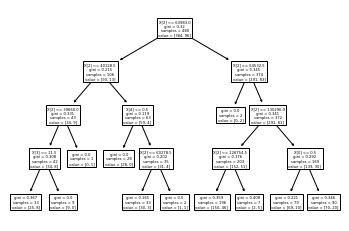

In [21]:
#PLot the decision tree
tree.plot_tree(model_gini)

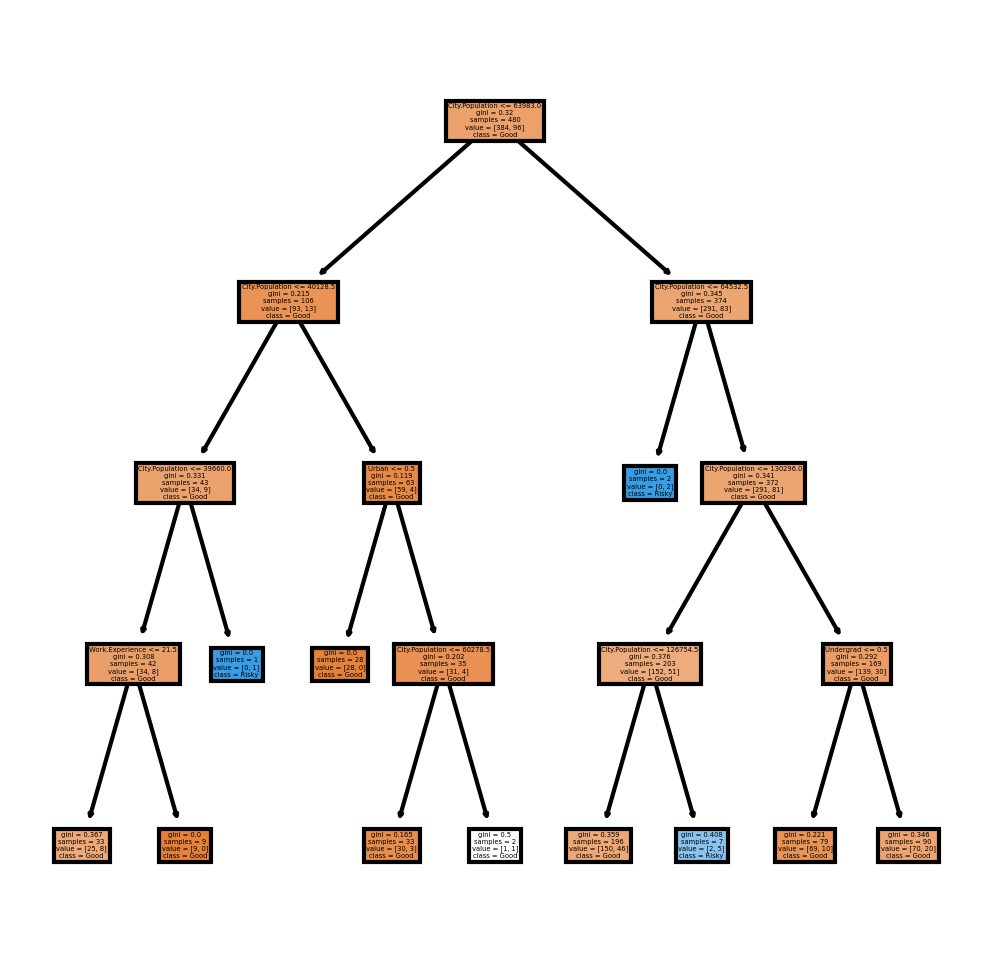

In [22]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [23]:
#Predicting on test data
preds_gini = model_gini.predict(x_test) # predicting on test data set 
pd.Series(preds_gini).value_counts() # getting the count of each category  

0    116
1      4
dtype: int64

In [24]:
pd.crosstab(y_test,preds_gini)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Y,,
0,89,3
1,27,1


In [25]:
#classification_report
print(classification_report(y_test,preds_gini))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86        92
           1       0.25      0.04      0.06        28

    accuracy                           0.75       120
   macro avg       0.51      0.50      0.46       120
weighted avg       0.65      0.75      0.67       120

